Para esta sección, siga los pasos para crear la clasificación:
Para un grupo de datos simulados, use la siguiente función:

In [28]:
def plot_dendrogram(model, **kwargs):
    
#Esta función extrae la información de un modelo
#AgglomerativeClustering
#y representa su dendograma con la función dendogram de
#scipy.cluster.hierarchy

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

Para la siguiente clasificación construya un dendrograma, con distintas métricas.

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

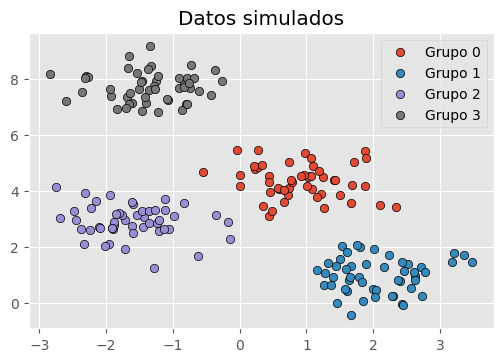

In [30]:
#grafico del ejericio
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std  = 0.60, shuffle = True, random_state = 0 )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
for i in np.unique(y):
    ax.scatter( x = X[y == i, 0], y = X[y == i, 1], c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o', edgecolor = 'black', label= f"Grupo {i}" )
ax.set_title('Datos simulados')
ax.legend();

In [32]:
#modelos
X_scaled = scale(X)
modelo_hclust_complete = AgglomerativeClustering(affinity = 'euclidean', linkage  = 'complete', distance_threshold = 0, n_clusters = None )
modelo_hclust_complete.fit(X=X_scaled)
modelo_hclust_average = AgglomerativeClustering(affinity = 'euclidean', linkage  = 'average',distance_threshold = 0, n_clusters = None)
modelo_hclust_average.fit(X=X_scaled)
modelo_hclust_ward = AgglomerativeClustering(affinity = 'euclidean', linkage  = 'ward', distance_threshold = 0, n_clusters = None)
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

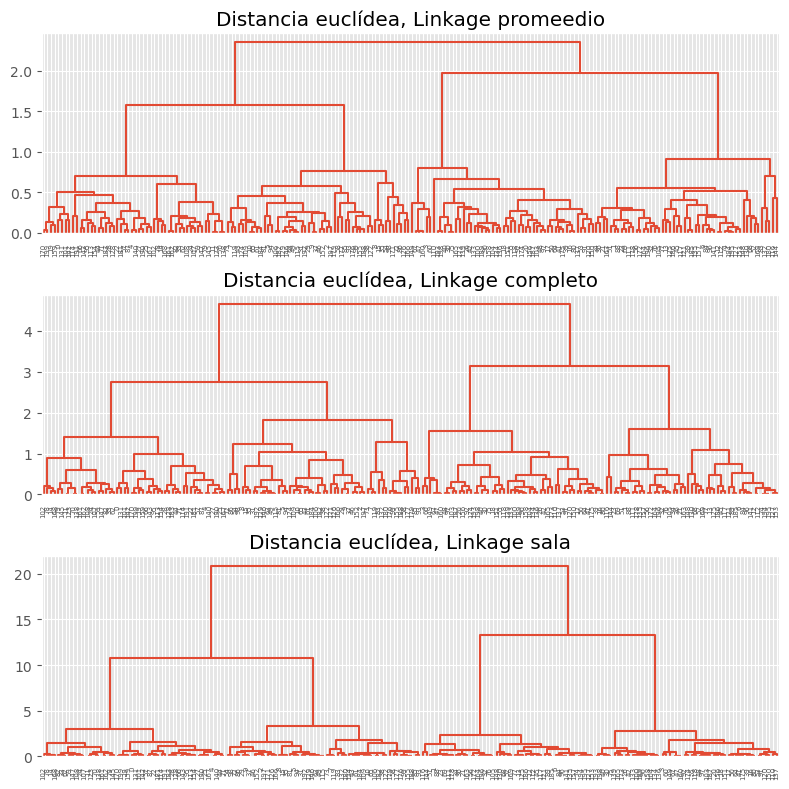

In [33]:
#grafico de los modelos
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage promeedio")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage completo")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage sala")
plt.tight_layout();

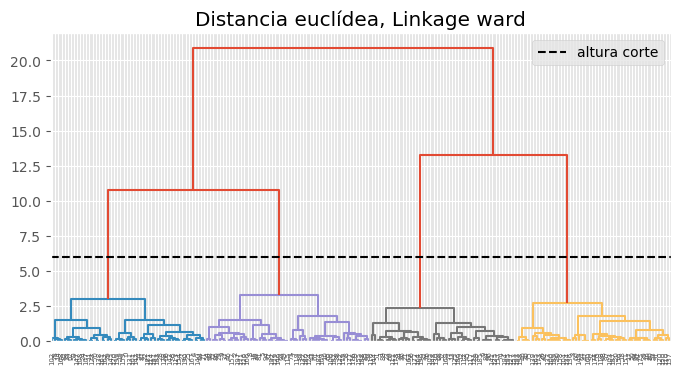

In [11]:
#grafico con la latura de corte para el modelo Linkage sala
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage sala")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

Establezca el k adecuado para estos datos.

Tome la decisión por medio de “índices silhouette”

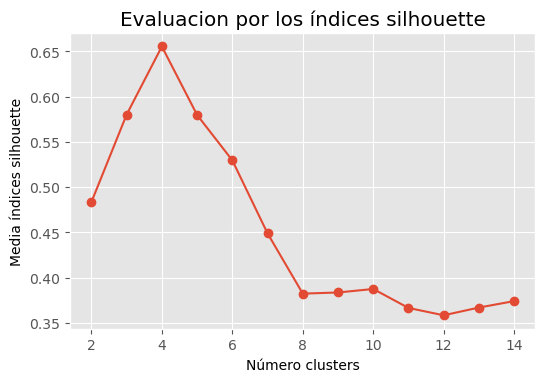

In [27]:
#Evaluacion de ndices silhouette
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(affinity   = 'euclidean', linkage    = 'ward', n_clusters = n_clusters)
    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evaluacion por los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Con un cluster 4 tiene el mejor promedio.

In [35]:
#Realizacion del modelo con un clusters 4
modelo_hclust_complete = AgglomerativeClustering(affinity = 'euclidean', linkage  = 'complete', n_clusters = 4 )
modelo_hclust_complete.fit(X=X_scaled)
modelo_hclust_average = AgglomerativeClustering(affinity = 'euclidean', linkage  = 'average', n_clusters = 4)
modelo_hclust_average.fit(X=X_scaled)
modelo_hclust_ward = AgglomerativeClustering(affinity = 'euclidean', linkage  = 'ward', n_clusters = 4)
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)